In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np
import pandas as pd

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.linalg as la
import scipy.stats as stats
import random
from sklearn.linear_model import LinearRegression

# library written for this exercise providing additional functions for assignment submission, and others
import utils 

# define the submission/grader object for this exercise
grader = utils.Grader()

# tells matplotlib to embed plots within the notebook
%matplotlib inline

##### Univariate Linear Regression from Scratch

In [2]:
x = stats.uniform.rvs(0, 1, 1000) * 10
y = -30.1415 + (5.5 * x) + stats.norm.rvs(2.4, 7.2, 1000)

df = pd.DataFrame({'bias': np.ones(1000), 'x': x, 'y': y})
df.head()

,bias,x,y
0,1.0,7.988294,23.893912
1,1.0,4.029386,-0.311169
2,1.0,1.329887,-29.864369
3,1.0,7.068469,12.911300
4,1.0,2.007756,-14.937782


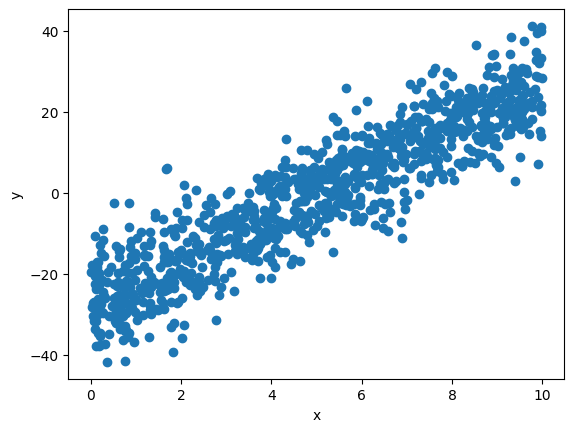

In [3]:
plt.scatter(df['x'], df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
# Prepare the data (including the bias term as the first column)
y = df['y'].values.reshape(1, -1)
X = df[['bias', 'x']].values.T

X.shape, y.shape

((2, 1000), (1, 1000))

In [5]:
# Initialize theta (including bias and slope) with any random values between -1 and 1 
# i.e uniform(-1, 1)
theta = stats.uniform.rvs(-1, 1, size=(X.shape[0], 1))  # Includes bias and slope
theta.shape

(2, 1)

In [6]:
theta

array([[-0.67884181],
       [-0.58581918]])

In [7]:
# let's define the cost function

def cost_function(theta: np.array, X: np.array, y: np.array, m: int=X.shape[1]):
    # h(X) - y
    diff = np.dot(theta.T, X) - y
    
    cost = (1./(2*m)) * np.sum(diff**2)
    
    return cost


# let's define a function to get the gradients

def get_gradient(theta: np.array, X: np.array, y: np.array, m: int=X.shape[1]):
    # h(X) - y
    diff = np.dot(theta.T, X) - y
    
    gradient = (1./m) * np.dot(X, diff.T)
    
    return gradient


In [8]:

def run(n_iterations: int=10000, lr: float=0.001):
    # Initialize theta
    theta = stats.uniform.rvs(-1, 1, size=(X.shape[0], 1))
    
    # to plot the cost over the iteration
    costs = []
    
    for i in range(n_iterations):
        cost = cost_function(theta=theta, X=X, y=y)
        costs.append(cost)
        
        if (i % 10) == 0:
            print(f"The cost at {i}th iteration is {cost}")
            print(f"Theta: {theta.T}")
            print("************************************************\n")
        
        gradient = get_gradient(theta=theta, X=X, y=y)
        
        # update the theta 
        theta = theta - (lr * gradient)
    
    return theta, np.array(costs)

In [9]:
n_iterations = 20000

optimal_theta, costs = run(n_iterations=n_iterations)
optimal_theta

The cost at 0th iteration is 173.0555469304662
Theta: [[-0.96495143 -0.39146794]]
************************************************

The cost at 10th iteration is 144.59463336468465
Theta: [[-0.95241788  0.14380505]]
************************************************

The cost at 20th iteration is 130.11501297603422
Theta: [[-0.96287916  0.52553974]]
************************************************

The cost at 30th iteration is 122.63909220963423
Theta: [[-0.98956598  0.79860656]]
************************************************

The cost at 40th iteration is 118.67211254297054
Theta: [[-1.02768776  0.99476078]]
************************************************

The cost at 50th iteration is 116.46370599973939
Theta: [[-1.07385429  1.13647594]]
************************************************

The cost at 60th iteration is 115.13718894327477
Theta: [[-1.1256664   1.23965684]]
************************************************

The cost at 70th iteration is 114.25346572471274
Theta: [[-1.181

array([[-27.30199156],
       [  5.41984329]])

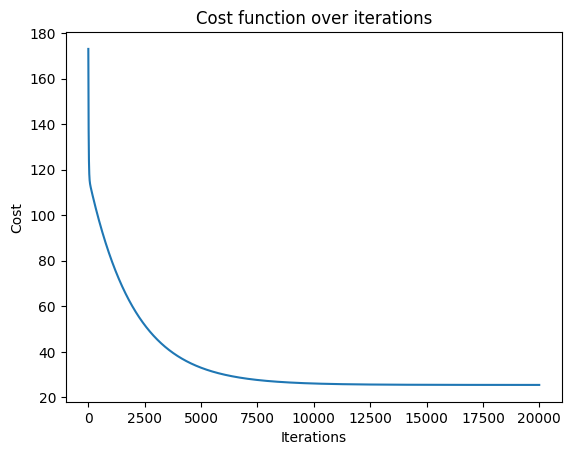

In [10]:
# Plot the cost over iterations
plt.plot(range(n_iterations), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function over iterations')
plt.show()

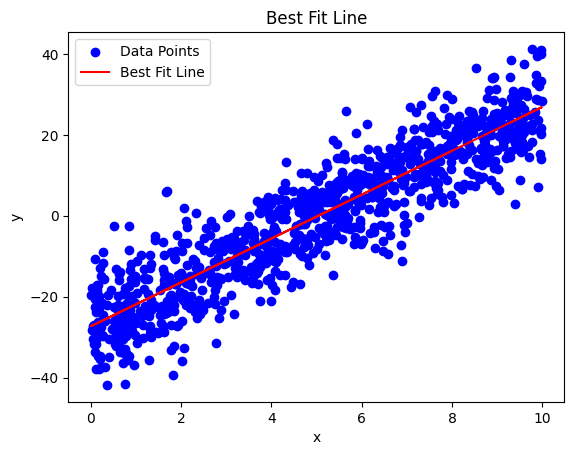

In [11]:
# Compute the predicted y values (best fit line) using the optimal theta
# y_pred = theta_0 + theta_1 * x
y_pred = optimal_theta[0] + optimal_theta[1] * df['x']

# Plot the original data points
plt.scatter(df['x'], df['y'], color='blue', label='Data Points')

# Plot the best fit line
plt.plot(df['x'], y_pred, color='red', label='Best Fit Line')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best Fit Line')

# Show the legend
plt.legend()
plt.show()

In [18]:
y_pred = np.dot(optimal_theta.T, X)
y_pred.shape

(1, 1000)

In [22]:
# define a function to get the value of R-squared

def R_squared(y, y_pred):
    # sum of squared error
    se = np.sum((y - y_pred)**2)
    
    # calculate total variation in y
    y_bar = np.mean(y)
    total_variation_y = np.sum((y - y_bar)**2)
    
    return 1 - (se/total_variation_y)

In [23]:
R_squared(
    y,
    y_pred
)

0.8315450357941242

In [24]:
from sklearn.metrics import r2_score

In [26]:
r2_score(
    y.T,
    y_pred.T
)

0.8315450357941242

##### Using Sklearn

In [12]:
# Reshape the feature (x) and fit the linear regression model
# X = df[['x']]  # Use 'x' as the independent variable
model = LinearRegression()

# Fit the model
model.fit(df[['x']], df['y'])

# Model parameters
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

Intercept: -27.48507275612438
Coefficient: 5.447465196922376
